In [1]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D 
from pylab import meshgrid

In [2]:
mat = scipy.io.loadmat('hw03_dataset.mat') 
X_train = np.array(mat['X_trn'])
Y_train = np.array(mat['Y_trn'])
X_test = np.array(mat['X_tst'])
Y_test = np.array(mat['Y_tst'])


In [3]:
print( X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)


(126, 2) (126, 1) (14, 2) (14, 1)


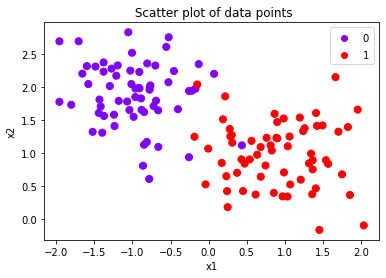

In [4]:
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=50, cmap='rainbow'); 
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(" Scatter plot of data points")
plt.legend(*scatter.legend_elements())
plt.show() 

In [5]:
# "Support Vector Classifier" 
from sklearn.svm import SVC 
clf = SVC(kernel='linear') 
#clf_sm = svm.SVC(kernel ='linear', C = 2**-5)

In [6]:
# fitting x samples and y classes 
clf.fit(X_train, Y_train.ravel()) 

SVC(kernel='linear')

In [7]:
# predicting for train set
y_predict_train = clf.predict(X_train)
#y_predict_train_sm = clf_sm.predict(X_train)

In [8]:
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(Y_train,y_predict_train))
#print(classification_report(Y_train,y_predict_train))

In [9]:
def getClassificationError(y,y_pred): 
    cnt =0
    for i in range (len(y)): 
        if y[i] == y_pred[i]:
            cnt += 1
    return (len(y)-cnt)/len(y)

In [10]:
def plot_reg(X, y, beta0,beta1,beta2,title_label): 
    '''
    function to plot decision boundary 
    '''
    # labelled observations
    x_0 = X[np.where(y == 0.0)[0]]
    x_1 = X[np.where(y == 1.0)[0]]

    # plotting points with diff color for diff label
    plt.scatter([x_1[:, 0]], [x_1[:, 1]], c='r', label='y = 1',alpha = .7)
    plt.scatter([x_0[:, 0]], [x_0[:, 1]], c='g', label='y = -1')
    # plotting decision boundary
    x1 = np.arange(-.5, .5, 0.1)
    x2 = -(beta0 + beta1*x1)/beta2 
    plt.plot(x1, x2, c='k', label='classification line') # Labelling
    plt.title(title_label)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

In [11]:
print ( getClassificationError(Y_train,y_predict_train))

0.031746031746031744


In [12]:
beta0 = clf.intercept_[0] 
beta1, beta2 = clf.coef_.T
print(beta0,beta1[0],beta2[0])

1.6408566218721556 2.2853505752206678 -1.0342108481652734


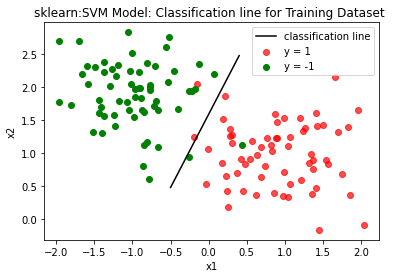

In [13]:
# plotting the data and classification line for test set
X = np.array(mat['X_trn']) 
y = np.array(mat['Y_trn'])
plot_reg(X,y, beta0,beta1[0],beta2[0],
"sklearn:SVM Model: Classification line for Training Dataset ")


In [14]:
# predicting for test set
y_predict_test = clf.predict(X_test)
print ( getClassificationError(Y_test,y_predict_test))

0.07142857142857142


In [15]:
#print(confusion_matrix(Y_test,y_predict_test))
#print(classification_report(Y_test,y_predict_test))

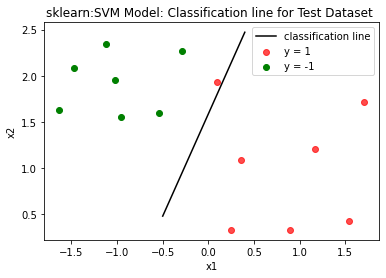

In [16]:
# plotting the data and classification line for test set
X = np.array(mat['X_tst']) 
y = np.array(mat['Y_tst'])
plot_reg(X,y, beta0,beta1[0],beta2[0],
"sklearn:SVM Model: Classification line for Test Dataset ")